In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# change directories -- DON'T RUN MORE THAN ONCE
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.dirname(os.getcwd()))
os.chdir('Data')

In [57]:
# read in data
df = pd.read_csv('pca_data.csv')
df = df[(df['Year'] >= 2011) & (df['Year'] <= 2019)]
X = df.drop(['Cruder_Rate', 'Crude_Rate', 'geometry', 'FIPS', 'State', 'County', 'Latitude', 'Longitude', 'Urbanicity', 'Jail_Population', 'Incarceration_Rate_per_100k', 'Dispense_rate'], axis = 1)
y = df['Cruder_Rate']

<AxesSubplot:>

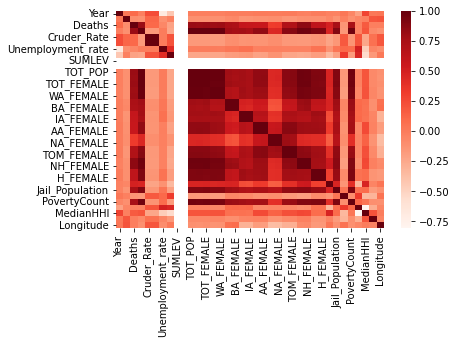

In [71]:
sns.heatmap(df.corr(), cmap = "Reds")

In [58]:
X.isnull().sum()

Year                 0
Deaths               0
Population           0
Deathrate_per_100    0
Unemployment_rate    0
SUMLEV               0
AGEGRP               0
TOT_POP              0
TOT_MALE             0
TOT_FEMALE           0
WA_MALE              0
WA_FEMALE            0
BA_MALE              0
BA_FEMALE            0
IA_MALE              0
IA_FEMALE            0
AA_MALE              0
AA_FEMALE            0
NA_MALE              0
NA_FEMALE            0
TOM_MALE             0
TOM_FEMALE           0
NH_MALE              0
NH_FEMALE            0
H_MALE               0
H_FEMALE             0
PovertyCount         0
PovertyPercentage    0
MedianHHI            0
dtype: int64

[1.71064685e+01 2.62349251e+00 2.06388441e+00 1.39683547e+00
 1.14428895e+00 7.56530588e-01 5.85538872e-01 3.91147544e-01
 3.35643288e-01 2.64281927e-01 1.49285091e-01 1.10351246e-01
 4.20483520e-02 2.89688629e-02 1.73611750e-03 1.01156418e-03
 6.03599092e-04 4.71514875e-04 4.02974272e-04 1.90779814e-04
 1.54294547e-04 1.51238411e-05 3.78623474e-31 9.84680740e-32
 9.84680740e-32 9.84680740e-32 9.84680740e-32 9.84680740e-32
 4.04693199e-32]
[6.33494270e+01 9.71543293e+00 7.64306758e+00 5.17282260e+00
 4.23758119e+00 2.80161737e+00 2.16839332e+00 1.44851480e+00
 1.24296900e+00 9.78700465e-01 5.52839121e-01 4.08657591e-01
 1.55715308e-01 1.07278768e-01 6.42926676e-03 3.74606899e-03
 2.23527472e-03 1.74613464e-03 1.49231206e-03 7.06504203e-04
 5.71390357e-04 5.60072740e-05 1.40213512e-30 3.64651306e-31
 3.64651306e-31 3.64651306e-31 3.64651306e-31 3.64651306e-31
 1.49867767e-31]


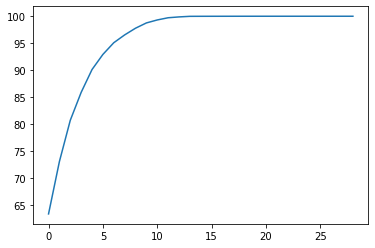

In [64]:
# let's do the PCA
sc = StandardScaler()
x_scaled = sc.fit_transform(X)
pca = PCA(n_components = None)
pca.fit(x_scaled)

# these are the eigenvalues
print(pca.explained_variance_)

# these are the explained variances
print(pca.explained_variance_ratio_ * 100)

# make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))

In [63]:
# let's look at feature importance
print(abs( pca.components_ ))

[[3.31294922e-03 1.94047374e-01 2.39517821e-01 4.12148893e-02
  1.72083262e-03 3.25260652e-19 3.38813179e-21 2.39503352e-01
  2.39592743e-01 2.39354415e-01 2.34378457e-01 2.33776833e-01
  1.85597058e-01 1.80309670e-01 1.96001703e-01 1.90352614e-01
  2.10804394e-01 2.11539575e-01 1.30295442e-01 1.32661389e-01
  2.22479573e-01 2.24542855e-01 2.30894375e-01 2.29940226e-01
  2.18381594e-01 2.17084932e-01 2.30126352e-01 7.67146259e-03
  4.81193304e-02]
 [3.47545411e-01 1.33871299e-03 1.50657351e-02 7.96564274e-02
  4.74763927e-01 0.00000000e+00 6.93889390e-18 1.51327891e-02
  1.32117206e-02 1.69826470e-02 8.61491763e-03 1.01339352e-02
  1.11662275e-01 1.15662721e-01 7.85854169e-02 8.18150039e-02
  7.34576248e-02 7.37788593e-02 1.52274871e-01 1.51555164e-01
  8.83877522e-02 8.06398300e-02 2.11885155e-02 1.47089575e-02
  6.62269645e-02 6.76968185e-02 1.18965930e-01 5.08053990e-01
  5.04416366e-01]
 [1.83312346e-01 1.80316644e-01 7.31616583e-02 4.96191506e-02
  1.93428317e-01 3.33066907e-16 1.

<AxesSubplot:>

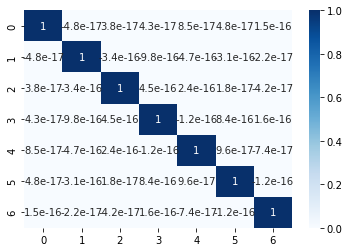

In [68]:
pca = PCA(n_components = 7)
X_pca = pca.fit_transform(x_scaled)
X_pca = pd.DataFrame(X_pca)

sns.heatmap(X_pca.corr(), annot = True, cmap = "Blues")

Okay, so above we did PCA on our dummy dataset (dropping columns with any missing values for our dataset between 2011 - 2019). It seems that it worked, considering after doing PCA and selecting the first 7 principal components, we have low multicollinearity between our variables.